Resource page (all the reading material is there. please scroll and everything): https://deeplizard.com/learn/video/RznKVRTFkBY

# Data Preparation and Processing 

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

Example data:

* An experimental drug was tested on individuals form ages 13 to 100 in a clinical trial.
* The trail had 2100 participants. Half were under 65 years old, halp were 65 years or older.
* Around 95% of patients 65 or older experienced side effects.
* Around 95% of patients under 65 ezperienced no side effects.




### 1. Generate some raw data and then transform into numpy array and rescale the data between 0 and 1.

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 65)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The ~95% of older individuals who did experience side effect
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)
    

Checking out train_samples(input_features) and train_labels(output_labels)

In [4]:
# for i in train_samples:
#     print(i)

In [5]:
# for i in train_labels:
#     print(i)

In [6]:
print(len(train_samples))
print(len(train_labels))

2100
2100


#### Transforms the "Train_labels" list into numpy array 

In [7]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

train_samples, train_labels = shuffle(train_samples, train_labels)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) # reshape(-1,1) is only for formality because fit_transform doesnot accept 1D data by default.

In [9]:
# for i in scaled_train_samples:
#     print(i)

### 2. Build model

#### Simple tf.keras Sequential Model

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [11]:
# This code will give error because I have no GPU

# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [12]:
# this is the sequential model (actual model)
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. Use the data that we created last time

In [14]:
# prepare the model for training
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [15]:
train_labels = np.reshape(train_labels, (-1, 1))  # To match the shape between the model's predictions (scaled_train_samples) and the actual labels (train_labels) during the training process. Before passing it to the model.fit() function.

train_labels.shape, scaled_train_samples.shape

((2100, 1), (2100, 1))

In [16]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 2s - loss: 0.6615 - accuracy: 0.5567 - 2s/epoch - 7ms/step
Epoch 2/30
210/210 - 0s - loss: 0.6385 - accuracy: 0.6105 - 305ms/epoch - 1ms/step
Epoch 3/30
210/210 - 0s - loss: 0.6161 - accuracy: 0.6543 - 300ms/epoch - 1ms/step
Epoch 4/30
210/210 - 1s - loss: 0.5924 - accuracy: 0.6952 - 549ms/epoch - 3ms/step
Epoch 5/30
210/210 - 1s - loss: 0.5647 - accuracy: 0.7448 - 871ms/epoch - 4ms/step
Epoch 6/30
210/210 - 1s - loss: 0.5360 - accuracy: 0.7800 - 547ms/epoch - 3ms/step
Epoch 7/30
210/210 - 1s - loss: 0.5037 - accuracy: 0.8081 - 836ms/epoch - 4ms/step
Epoch 8/30
210/210 - 1s - loss: 0.4672 - accuracy: 0.8338 - 755ms/epoch - 4ms/step
Epoch 9/30
210/210 - 1s - loss: 0.4332 - accuracy: 0.8614 - 831ms/epoch - 4ms/step
Epoch 10/30
210/210 - 1s - loss: 0.4011 - accuracy: 0.8876 - 647ms/epoch - 3ms/step
Epoch 11/30
210/210 - 1s - loss: 0.3743 - accuracy: 0.8933 - 628ms/epoch - 3ms/step
Epoch 12/30
210/210 - 0s - loss: 0.3530 - accuracy: 0.9033 - 461ms/epoch - 2ms/step
Epoc

### 4. Create validation set using keras API

In [17]:
# adding "validation_split=0.1". ie, validation data is 10%
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.2649 - accuracy: 0.9339 - val_loss: 0.2413 - val_accuracy: 0.9429 - 908ms/epoch - 5ms/step
Epoch 2/30
189/189 - 1s - loss: 0.2642 - accuracy: 0.9370 - val_loss: 0.2408 - val_accuracy: 0.9429 - 997ms/epoch - 5ms/step
Epoch 3/30
189/189 - 0s - loss: 0.2634 - accuracy: 0.9344 - val_loss: 0.2407 - val_accuracy: 0.9476 - 416ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2627 - accuracy: 0.9333 - val_loss: 0.2405 - val_accuracy: 0.9476 - 418ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2622 - accuracy: 0.9386 - val_loss: 0.2395 - val_accuracy: 0.9429 - 414ms/epoch - 2ms/step
Epoch 6/30
189/189 - 1s - loss: 0.2614 - accuracy: 0.9354 - val_loss: 0.2392 - val_accuracy: 0.9429 - 660ms/epoch - 3ms/step
Epoch 7/30
189/189 - 1s - loss: 0.2610 - accuracy: 0.9339 - val_loss: 0.2391 - val_accuracy: 0.9429 - 1s/epoch - 5ms/step
Epoch 8/30
189/189 - 1s - loss: 0.2604 - accuracy: 0.9339 - val_loss: 0.2388 - val_accuracy: 0.9429 - 560ms/epoch - 3ms/step
Epo

### 5. Test dataset for model inference


#### Preprocess test data

In [18]:
test_samples = []
test_labels = []

In [19]:
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 65)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The ~95% of older individuals who did experience side effect
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)


In [20]:
# converting to numpy array
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

# shuffle the data
test_samples, test_labels = shuffle(test_samples, test_labels)


In [21]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

#### predict

In [22]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [23]:
# for i in predictions:
#     print(i)

In [24]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [25]:
# for i in rounded_predictions:
#     print(i)

### 6. Confusion Matrix

In [28]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [30]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [34]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title="Confusion matrix",
                         cmap=plt.cm.Blues):
    
    """
    This function prints and plots the Confusion matrix.
    Normalization can be applied by setting
    """
    
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
        plt.tight_layout()
        plt.ylabel("True")
        plt.xlabel("Predicted label")
    

Confusion matrix, without normalization
[[196  14]
 [ 10 200]]


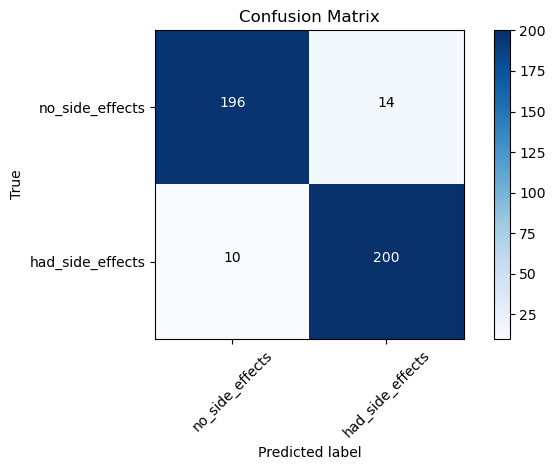

In [35]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

### 7. Save and Load a Model

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 7.1 model.save()

In [38]:
# Check first to see if file exists already.
# if not, the model is saved to disk.

import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

This save function saves:

* The architecture of model, allowing to re-create the model.
* The weights of the model.
* The training configuration (loss, optimizer).
* The sate of the optimizer, allowing to resume training exactly where you left off.

In [40]:
from tensorflow.keras.models import load_model
new_model = load_model("models/medical_trial_model.h5")

In [41]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [42]:
new_model.get_weights()

[array([[-0.15272918, -0.27042383,  0.34403652,  0.02653278, -0.27319068,
         -0.47133034,  0.32500026, -0.37502414, -0.15140371,  0.6056119 ,
          0.71764976, -0.00081064,  0.3714248 ,  0.49588996,  0.22674586,
          0.31961524]], dtype=float32),
 array([ 0.        ,  0.        , -0.11563599,  0.22129276,  0.        ,
         0.        , -0.12047233,  0.        ,  0.15634347, -0.05536151,
        -0.14763816, -0.00033998, -0.13597076, -0.16342658, -0.10470809,
        -0.12437526], dtype=float32),
 array([[ 6.92729056e-02, -2.12842092e-01,  8.02686810e-03,
          2.11297423e-01, -1.16035327e-01,  2.98596650e-01,
          1.39877290e-01, -2.11551040e-01,  9.04641747e-02,
          2.25701064e-01, -2.08403006e-01,  2.83056825e-01,
         -2.42660642e-01, -1.56875372e-01, -6.41373992e-02,
          2.72773474e-01, -3.23853940e-01,  4.66244519e-02,
          1.00181401e-02, -1.60423547e-01,  3.43096167e-01,
         -2.69892812e-01,  3.32949966e-01,  1.19206697e-01,
 

In [43]:
new_model.optimizer

### 7.2 model.to_json()

If you only need to save the architecture of model, and it's weights or it's training configuration, you can use the following function to save the architecture only.

In [44]:
# Save as JSON
json_string = model.to_json()

# save as YAML
# yaml_stirng = model.to_yaml()

In [45]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [49]:
# model reconstruction form JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [50]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.save_weights()

If you only need to save the weights of model, you can use the following function save the weights only.

In [51]:
# checks first to see if file exists already.
# If not, the weights are save to disk.

import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')

In [52]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [54]:
model2.load_weights("models/my_model_weights.h5")

In [55]:
model2.get_weights()

[array([[-0.15272918, -0.27042383,  0.34403652,  0.02653278, -0.27319068,
         -0.47133034,  0.32500026, -0.37502414, -0.15140371,  0.6056119 ,
          0.71764976, -0.00081064,  0.3714248 ,  0.49588996,  0.22674586,
          0.31961524]], dtype=float32),
 array([ 0.        ,  0.        , -0.11563599,  0.22129276,  0.        ,
         0.        , -0.12047233,  0.        ,  0.15634347, -0.05536151,
        -0.14763816, -0.00033998, -0.13597076, -0.16342658, -0.10470809,
        -0.12437526], dtype=float32),
 array([[ 6.92729056e-02, -2.12842092e-01,  8.02686810e-03,
          2.11297423e-01, -1.16035327e-01,  2.98596650e-01,
          1.39877290e-01, -2.11551040e-01,  9.04641747e-02,
          2.25701064e-01, -2.08403006e-01,  2.83056825e-01,
         -2.42660642e-01, -1.56875372e-01, -6.41373992e-02,
          2.72773474e-01, -3.23853940e-01,  4.66244519e-02,
          1.00181401e-02, -1.60423547e-01,  3.43096167e-01,
         -2.69892812e-01,  3.32949966e-01,  1.19206697e-01,
 